In [17]:
import pandas as pd
import numpy as np

In [19]:
fid = '/Volumes/WDC_internal/Users/bell/in_and_outbox/2018/stabeno/nov/m8_winds/NARR_M8_UVT_Daily_94-95_17-18.xlsx'

fin = pd.read_excel(fid,sheet_name=0,parse_dates=['time'],index_col='time')

In [20]:
# calculate wind direction and magnitude
#  Wind Direction is defined as 0 in +U direction, 90 in +V, -180/180 in -U and -90 in -V with increasing ccw
fin['magnitude'] = np.sqrt(fin['WU_422']**2 + fin['WV_423']**2)
fin['direction'] = np.rad2deg(np.arctan2(fin['WV_423'],fin['WU_422']))

In [21]:
fin['month'] = fin.index.month_name()

In [22]:
# find values where magnitude is < 2 and make missing (these are calm/variable and will mess up temp averages)
fin.groupby([fin.month,pd.cut(fin.magnitude, [0,2])]).agg(['mean','min','max','count']).to_csv('temp_calm.csv')
fin.groupby([fin.month,pd.cut(fin.magnitude, [0,2])]).agg(['std']).to_csv('temp_calm_std.csv')

#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.magnitude, [0,2])]).agg(['mean','min','max','count']).to_csv('temp_calm.csv')
#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.magnitude, [0,2])]).agg(['std']).to_csv('temp_calm_std.csv')

In [23]:
fin[fin['magnitude'] <2] = np.nan

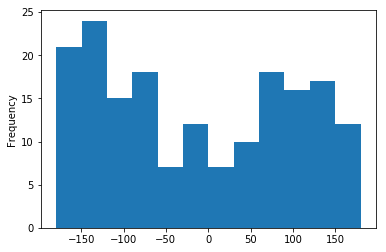

In [24]:
%matplotlib inline
fin.direction.plot.hist(bins=12)

In [25]:
#bins are closed right, open left
bins = [-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
fin.groupby([fin.month,pd.cut(fin.direction, bins)]).agg(['mean','min','max','count']).to_csv('temp.csv')
fin.groupby([fin.month,pd.cut(fin.direction, bins)]).agg(['std']).to_csv('temp_std.csv')

#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.direction, bins)]).agg(['mean','min','max','count']).to_csv('temp.csv')
#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.direction, bins)]).agg(['std']).to_csv('temp_std.csv')